# CS-401 Lab 6
## Arkaprabha Banerjee (201801408)

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from statistics import NormalDist

In [3]:
# Sample textbook file
df=pd.read_csv('Compfin_lab6 - Sheet1.csv')
df =  df.dropna()
stock = df['Stock price($)']
stock = stock.tolist()

In [4]:
def delta_val(x,k,r,sigma,t):
    temp = (np.log(x/k) + (r + 0.5*sigma*sigma)*t)/(sigma*np.sqrt(t))
    return temp


In [14]:
# simulation for 100,000 units
N = 100000
r = 0.05
sigma = 0.2
k = 50
T = 20

time = [(T-i)/52 for i in range(T+1)]
delta = []
shares_purchased = []
shares_cost = []
cumulative_cost = []
interest_cost = []
share_init = 0
share_total = 0
delta_int = 0 
for i in range(len(time)):
    if(time[i]==0):
        if(np.log(stock[i]/k)>0):
            delta.append(1)
        else:
            delta.append(0)
    else:
        temp = delta_val(stock[i],k,r,sigma,time[i])
        temp = NormalDist(mu=0, sigma=1).cdf(temp)
        delta.append(round(temp,3))
    
    temp = -share_init + N*delta[i]
    shares_purchased.append(temp)
    
    temp = shares_purchased[i]*stock[i]
    shares_cost.append(temp)
    
    temp = share_total + shares_cost[i]
    cumulative_cost.append(temp)
    # print(temp)
    
    temp = cumulative_cost[i] * r/52
    interest_cost.append(temp)

    share_init = N*delta[i]
    share_total = cumulative_cost[i]


In [13]:
print(round(2.445,3))

2.445


In [15]:
N = [i for i in range(len(time))]
df1 = pd.DataFrame(columns=['Week','Stock Price','Delta','Shares purchased','Cost of shares purchased','Cumulative cost','Interest cost'])
for i in range(len(N)):
    df1.loc[i,'Week']=i
    df1.loc[i,'Stock Price']=stock[i]
    df1.loc[i,'Delta']=delta[i]
    df1.loc[i,'Shares purchased']=shares_purchased[i]
    df1.loc[i,'Cost of shares purchased']=shares_cost[i]
    df1.loc[i,'Cumulative cost']=cumulative_cost[i]
    df1.loc[i,'Interest cost']=interest_cost[i]


In [16]:
df1.head(len(df1))

,Week,Stock Price,Delta,Shares purchased,Cost of shares purchased,Cumulative cost,Interest cost
0,0,49.0,0.522,52200.0,2557800.0,2557800.0,2459.423077
1,1,48.12,0.458,-6400.0,-307968.0,2249832.0,2163.3
2,2,47.37,0.4,-5800.0,-274746.0,1975086.0,1899.121154
3,3,50.25,0.596,19600.0,984900.0,2959986.0,2846.140385
4,4,51.75,0.693,9700.0,501975.0,3461961.0,3328.808654
5,5,53.12,0.774,8100.0,430272.0,3892233.0,3742.531731
6,6,53.0,0.771,-300.0,-15900.0,3876333.0,3727.243269
7,7,51.87,0.706,-6500.0,-337155.0,3539178.0,3403.055769
8,8,51.38,0.674,-3200.0,-164416.0,3374762.0,3244.963462
9,9,53.0,0.787,11300.0,598900.0,3973662.0,3820.828846


In [17]:
print(cumulative_cost[-1] - 100000*k)
# print(N*k)

195197.0


* 195197 is the delta hedging cost as well as the loss under our given assumptions
* The simulation varies slighty because values in the book have been rounded off

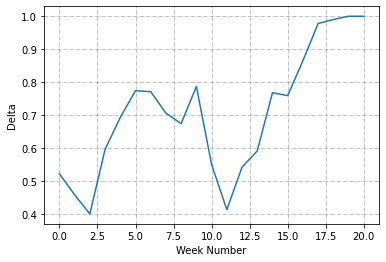

In [19]:
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.6,alpha = 0.8) 
plt.plot(delta)
plt.xlabel('Week Number')
plt.ylabel('Delta')
plt.show()


In [18]:
# Reliance data file weekly simulation
df=pd.read_csv('RELIANCE_Lab6.csv')
stock = df['Close Price']
stock = stock.tolist()
temp1=[]
for i in range(0,77,7):
    temp1.append(stock[i])
temp1.reverse()
stock = temp1
print(len(stock))

11


In [20]:
# simulation for 100,000 units
N = 100000
r = 0.05
sigma = 0.2
k = 2100
T = 10

time = [(T-i)/52 for i in range(T+1)]
delta = []
shares_purchased = []
shares_cost = []
cumulative_cost = []
interest_cost = []
share_init = 0
share_total = 0
delta_int = 0 
for i in range(len(time)):
    if(time[i]==0):
        if(np.log(stock[i]/k)>0):
            delta.append(1)
        else:
            delta.append(0)
    else:
        temp = delta_val(stock[i],k,r,sigma,time[i])
        delta.append(NormalDist(mu=0, sigma=1).cdf(temp))
    
    temp = -share_init + N*delta[i]
    shares_purchased.append(temp)
    
    temp = shares_purchased[i]*stock[i]
    shares_cost.append(temp)
    
    temp = share_total + shares_cost[i]
    cumulative_cost.append(temp)
    # print(temp)
    
    temp = cumulative_cost[i] * r/52
    interest_cost.append(temp)

    share_init = N*delta[i]
    share_total = cumulative_cost[i]


In [21]:
N = [i for i in range(len(time))]
df1 = pd.DataFrame(columns=['Week','Stock Price','Delta','Shares purchased','Cost of shares purchased','Cumulative cost','Interest cost'])
for i in range(len(N)):
    df1.loc[i,'Week']=i
    df1.loc[i,'Stock Price']=stock[i]
    df1.loc[i,'Delta']=delta[i]
    df1.loc[i,'Shares purchased']=shares_purchased[i]
    df1.loc[i,'Cost of shares purchased']=shares_cost[i]
    df1.loc[i,'Cumulative cost']=cumulative_cost[i]
    df1.loc[i,'Interest cost']=interest_cost[i]


In [22]:
df1.head(len(df1))

,Week,Stock Price,Delta,Shares purchased,Cost of shares purchased,Cumulative cost,Interest cost
0,0,1958.05,0.259624,25962.438385,50835752.479297,50835752.479297,48880.53123
1,1,1976.05,0.279084,1945.913159,3845221.697902,54680974.177199,52577.859786
2,2,2003.25,0.321333,4224.904477,8463539.89396,63144514.071159,60715.878915
3,3,1914.15,0.128318,-19301.460566,-36945890.742039,26198623.329121,25190.98397
4,4,1937.6,0.143245,1492.750901,2892354.145165,29090977.474285,27972.093725
5,5,1895.25,0.061097,-8214.832435,-15569161.171951,13521816.302334,13001.746445
6,6,1924.0,0.069315,821.74903,1581045.134345,15102861.436679,14521.982151
7,7,2059.65,0.374559,30524.437642,62869657.988628,77972519.425307,74973.57637
8,8,2144.85,0.728211,35365.158835,75852960.926568,153825480.351874,147909.115723
9,9,2190.45,0.941674,21346.367568,46758150.839037,200583631.190911,192868.876145


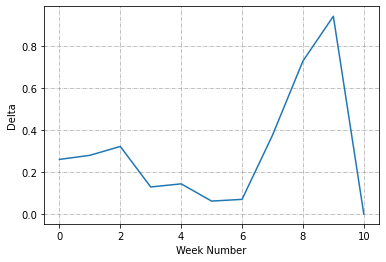

In [23]:
plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.6,alpha = 0.8) 
plt.plot(delta)
plt.xlabel('Week Number')
plt.ylabel('Delta')
plt.show()
